<a href="https://colab.research.google.com/github/rafaelmattos/Introducao-a-Ciencias-de-Dados/blob/main/Aula2_2_est_descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MBA em Ciência de Dados: Estatística descritiva

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
Copyright (c) 2023.

Nesta aula, vamos mostrar como descrevemos os dados em termos de medidas de estatística. Medidas de posição, dispersão e correlação serão cobertas, com aplicações em diferentes conjuntos de dados.

## Medidas de posição

### Moda

Uma medida importante de tendência central é a moda, que retorna o elemento mais comum em um conjunto de dados. Geralmente, essa medida é usada para atributos nominais.<br>
Vamos considerar um exemplo.

In [32]:
import numpy as np
X = [0,0,2,3,1,2,4,5,6,8,0,0,7,0,1,2,1,1,5,3,1,0,7,3,0,0,2,3,4,5,6,7,8,9,1,1,2,2,3]
print('X:', X)

X: [0, 0, 2, 3, 1, 2, 4, 5, 6, 8, 0, 0, 7, 0, 1, 2, 1, 1, 5, 3, 1, 0, 7, 3, 0, 0, 2, 3, 4, 5, 6, 7, 8, 9, 1, 1, 2, 2, 3]


Para calcularmos a moda, usamos o pacote Statistics:

In [33]:
from statistics import mode
m = mode(X)
print('A moda de X:', m)

A moda de X: 0


Podemos também identificar a moda visualmente em um gráfico de barras, que representa o valor mais frequente.

X: [0, 1, 1, 2, 2, 2, 3, 3]
Valores possíveis: [0 1 2 3]
Frequencia dos valores: [1. 2. 3. 2.]


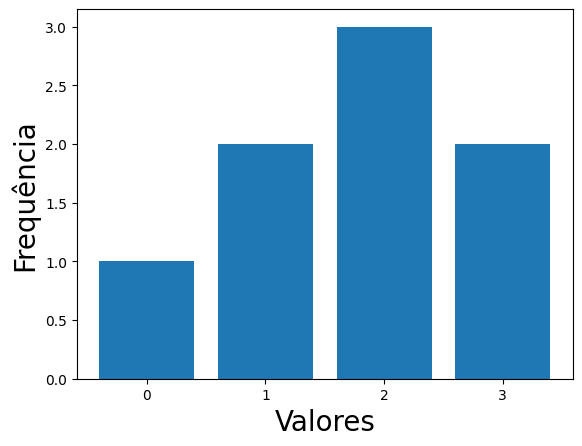

In [7]:
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos

# Usamos a funções sort e unique do Numpy para encontrar os valores
# possíveis em ordem crescente.
# esses valores serão mostrados na abscissa do gráfico.
values = np.sort(np.unique(X))
# vamos calcular a frequência de cada valor presente na lista
freq = np.zeros(len(values)) # armazena as frequencias
ind = 0 # indice do vetor de frequências
for i in values: # para os valores diferentes
    counter = 0 # conta as ocorrências
    for j in range(0,len(X)):
        if(X[j] == i):
            counter = counter + 1
    freq[ind] = counter
    ind = ind + 1

print('X:',X)
print('Valores possíveis:', values)
print('Frequencia dos valores:', freq)

y_pos = np.arange(len(values))
plt.xticks(y_pos, values)
plt.bar(y_pos, freq)
plt.xlabel("Valores",fontsize = 20)
plt.ylabel("Frequência", fontsize = 20)


plt.show()

Podemos aplicar a função em dados nominais:

In [8]:
Y = ["red", "blue", "blue", "red", "green", "red", "red"]
print('A moda de Y:', mode(Y))

A moda de Y: red


O gráfico de barras mostrando a frequêbncia:

Y: ['red', 'blue', 'blue', 'red', 'green', 'red', 'red']
Valores possíveis: ['blue' 'green' 'red']
Frequencia dos valores: [2. 1. 4.]


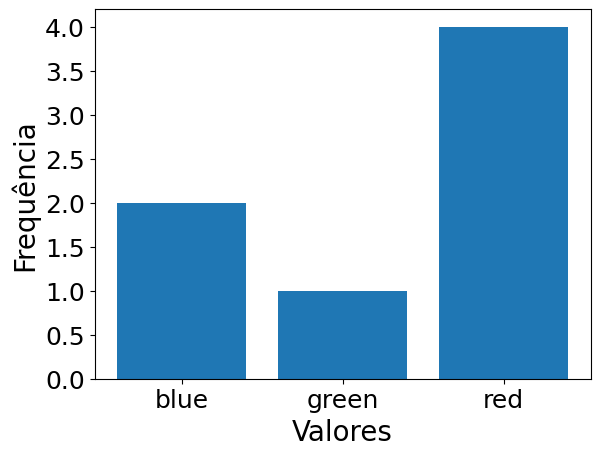

In [9]:
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos
values = np.sort(np.unique(Y)) #usamos a funções sort e unique do Numpy
# para encontrar os valores possíveis.
# vamos calcular a frequência de cada valor presente na lista
freq = np.zeros(len(values)) # armazena as frequencias
ind = 0 # indice do vetor de frequências
for i in values: # para os valores diferentes
    counter = 0 # conta as ocorrências
    for j in range(0,len(Y)):
        if(Y[j] == i):
            counter = counter + 1
    freq[ind] = counter
    ind = ind + 1

print('Y:',Y)
print('Valores possíveis:', values)
print('Frequencia dos valores:', freq)

y_pos = np.arange(len(values))
plt.xticks(y_pos, values)
plt.bar(y_pos, freq)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Valores",fontsize = 20)
plt.ylabel("Frequência", fontsize = 20)
plt.show()

### Média e Mediana

A média e mediana são medidas de tendência central usadas para dados quantitativos. Assim, a média:

In [34]:
import numpy as np
X = [0,0,2,3,1,2,4,5,6,8,0,0,7,0,1,2,1,1,5,3,1,0,7,3,0,0,2,3,4,5,6,7,8,9,1,1,2,2,3]
mx = np.mean(X)
print('X:', X)
print('A média:', mx)

X: [0, 0, 2, 3, 1, 2, 4, 5, 6, 8, 0, 0, 7, 0, 1, 2, 1, 1, 5, 3, 1, 0, 7, 3, 0, 0, 2, 3, 4, 5, 6, 7, 8, 9, 1, 1, 2, 2, 3]
A média: 2.948717948717949


No caso da mediana:

In [35]:
md = np.median(X)
print('X:', X)
print('A mediana:', md)

X: [0, 0, 2, 3, 1, 2, 4, 5, 6, 8, 0, 0, 7, 0, 1, 2, 1, 1, 5, 3, 1, 0, 7, 3, 0, 0, 2, 3, 4, 5, 6, 7, 8, 9, 1, 1, 2, 2, 3]
A mediana: 2.0


Se adicionarmos um valor extremo aos dados, vejamos como a média e a mediana se comportam:

In [12]:
X2 = [1,1,1,2,2,3,4,5,5,100]
print('X2:', X2)
print('A nova média:', np.mean(X2))
print('A nova mediana:', np.median(X2))

X2: [1, 1, 1, 2, 2, 3, 4, 5, 5, 100]
A nova média: 12.4
A nova mediana: 2.5


Ou seja, a média é altamente sensível a valores extremos, enquanto que a mediana é mais robusta.

Vamos considerar uma distribuição de probabilidades. Os dados são gerados a partir de distribuições normal e exponencial.

Para a distribuição normal, a média é indicada pela linha contínua e a mediana, pela tracejada.

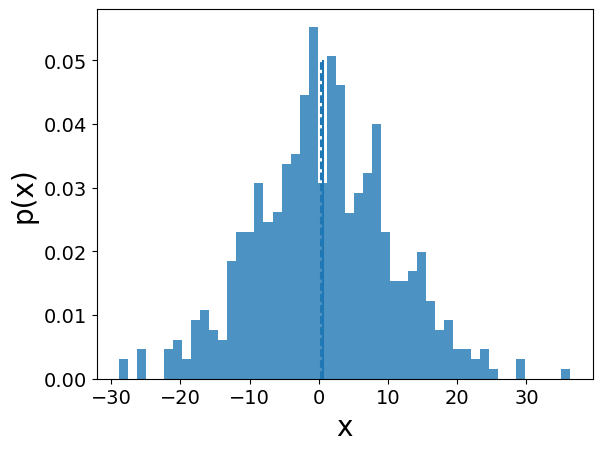

In [ ]:
import numpy as np
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos

mu = 0 # Média da distribuicao normal
sigma = 10 #desvio padrão da distribuição normal
Y = np.random.normal(mu, sigma, 500)
plt.hist(Y, density=True, bins=50,lw=0,alpha=.8)

m = np.mean(Y)
md = np.median(Y)
plt.vlines(m,0,0.05)
plt.vlines(md,0,0.05, linestyles = 'dashed')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)", fontsize = 20)
plt.show(True)

Para a distribuição exponencial, a média é indicada pela linha contínua e a mediana, pela tracejada.

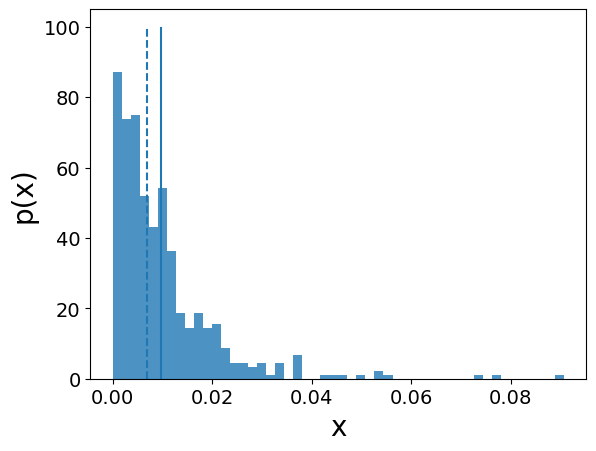

In [ ]:
import numpy as np
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos

lbda = 100 # taxa da distribuição exponencial
beta = 1.0/lbda

Y = np.random.exponential(beta, 500)
plt.hist(Y, density=True, bins=50,lw=0,alpha=.8)

m = np.mean(Y)
md = np.median(Y)
plt.vlines(m,0,lbda)
plt.vlines(md,0,lbda, linestyles = 'dashed')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)", fontsize = 20)

plt.show(True)

Notamos que a média é similar à mediana se a distribuição é praticamente simétrica em relação à média. Caso a distribuição não seja simétrica, o mais adequado é usar a mediana como medida central.

## Medidas de dispersão

As medidas de dispersão mais usadas são a variância e o desvio padrão. A distância interquantil (IQR) também é bastante usada e quantifica a diferença entre o terceiro e primeiro quantil. Já a amplitude simplesmente mede a diferença entre os valores máximo e mínimo.

In [36]:
from scipy.stats import iqr
import numpy as np

def variancia(X):
    m = np.mean(X)
    N = len(X)
    s = 0
    for i in np.arange(0, len(X)):
        s = s + (X[i]-m)**2
    s = s/(N-1)
    return s

#X = [0,0,1,1,18]
Y = [4, 4, 4, 4, 4]

𝑋=[0,0,2,3,1,2,4,5,6,8,0,0,7,0,1,2,1,1,5,3,1,0,7,3,0,0,2,3,4,5,6,7,8,9,1,1,2,2,3]

mx = np.mean(X)
my = np.mean(Y)
print('X:', X)
print('Média de X:', mx)
print('Variância de X:', variancia(X))
print('IQR de X:', iqr(X))
print('Amplitude de X:', np.max(X)-np.min(X))

print('\n')
print('Y:', Y)
print('Média de Y:', my)
print('Variância de Y:', variancia(Y))
print('IQR de Y:', iqr(Y))
print('Amplitude de Y:', np.max(Y)-np.min(Y))

X: [0, 0, 2, 3, 1, 2, 4, 5, 6, 8, 0, 0, 7, 0, 1, 2, 1, 1, 5, 3, 1, 0, 7, 3, 0, 0, 2, 3, 4, 5, 6, 7, 8, 9, 1, 1, 2, 2, 3]
Média de X: 2.948717948717949
Variância de X: 7.1551956815114695
IQR de X: 4.0
Amplitude de X: 9


Y: [4, 4, 4, 4, 4]
Média de Y: 4.0
Variância de Y: 0.0
IQR de Y: 0.0
Amplitude de Y: 0


Notem que os dados acima possuem a mesma média, mas a variância é bastante diferente.

## Correlação

Vamos considerar alguns casos para vermos como se comporta o coeficiente de correlação de Pearson de acordo com diferentes tendências entre as variáveis $X$ e $Y$.

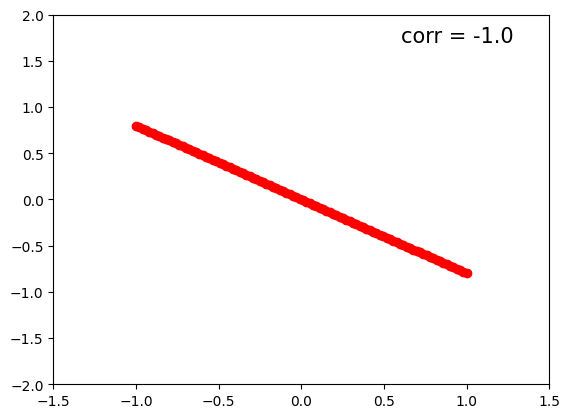

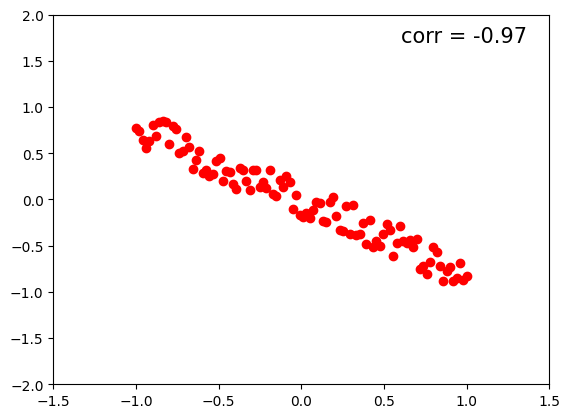

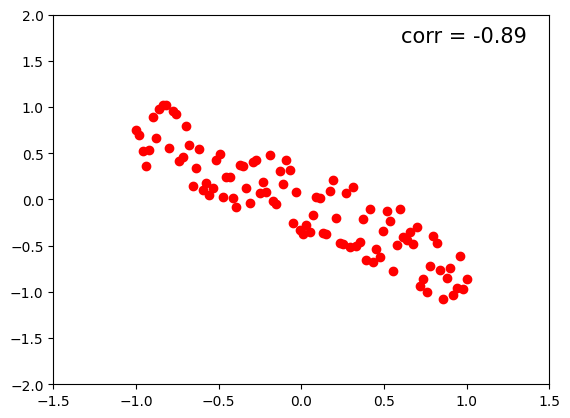

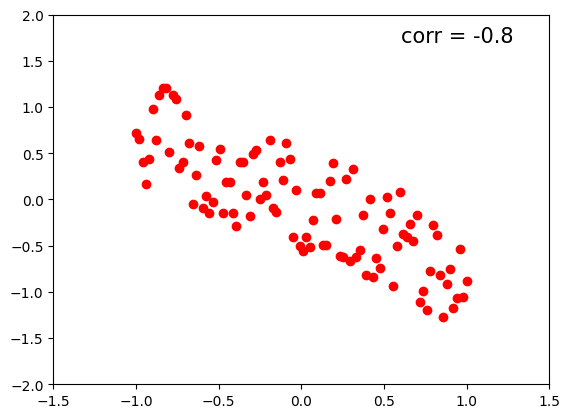

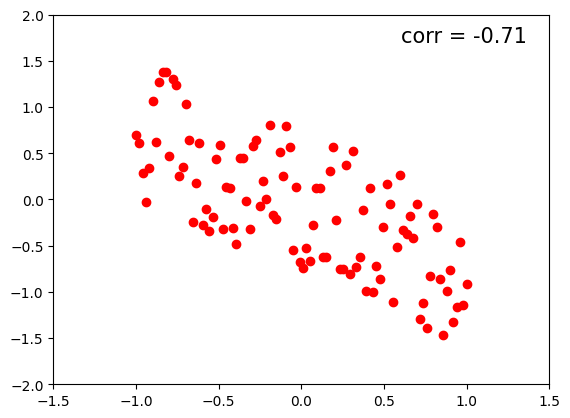

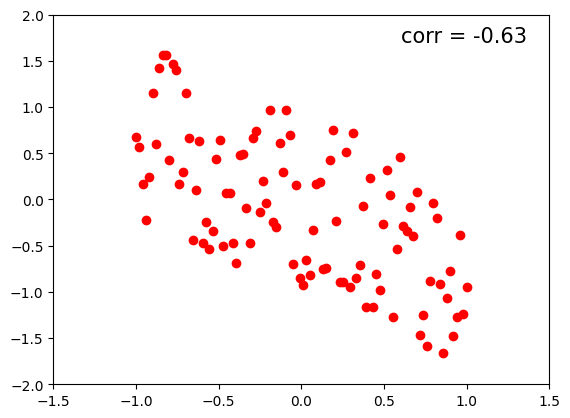

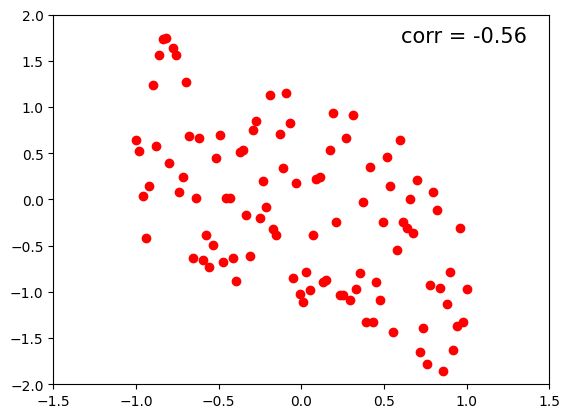

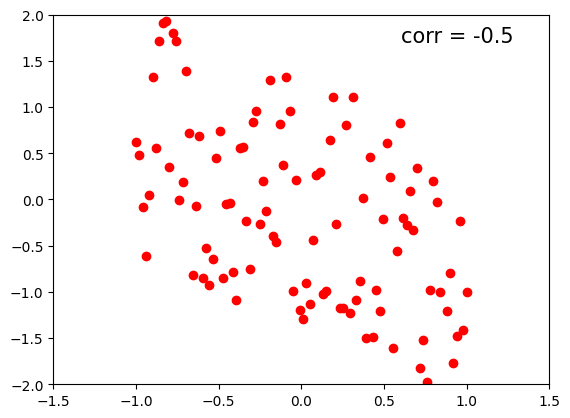

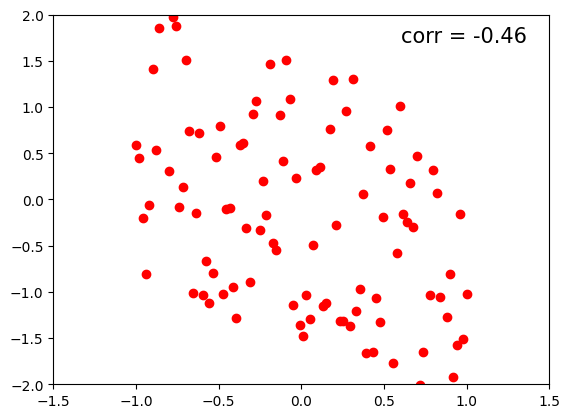

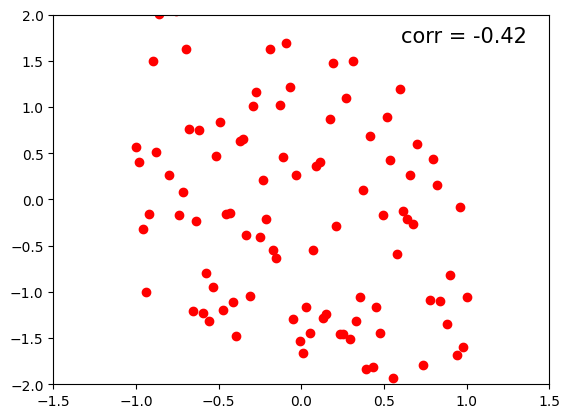

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

N = 100
X = np.linspace(-1,1, N)
erro = np.random.uniform(-1,1,N) # ruído a ser incluído na relação linear.
for sigma in np.arange(0,2,0.2):
    Y = -0.8*X + erro*sigma
    plt.plot(X,Y, 'ro')
    corr, p_value = pearsonr(X, Y) # calcula a correlação
    corr = int(corr*100)/100
    string = 'corr = '+ str(corr)
    plt.xlim(-1.5,1.5)
    plt.ylim(-2, 2)
    plt.text(0.6,1.7, string, fontsize=15)
    plt.show(True)

A medida de correlação é importante para analisar a relação entre as variáveis. Se duas variáveis são altamente correlacionadas, é adequado remover uma delas, de modo a reduzir informação redundante nos dados.

Vamos considerar a base de dados da flor Iris:

/var/folders/dv/br6j98lj70b3d_1qk377b3n40000gn/T/ipykernel_11248/2229657604.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


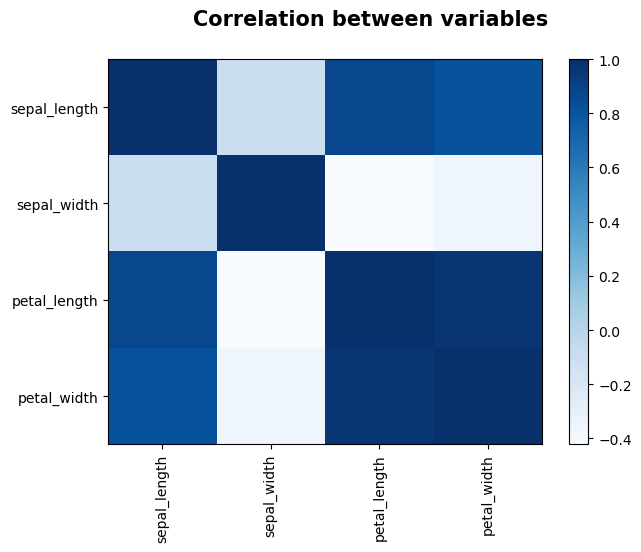

In [ ]:
import pandas as pd # biblioteca pandas
data = pd.read_csv('data/iris.csv', header=(0)) # lê os dados a partir do arquivo

corr = data.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(7, 5))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

Podemos mostrar a mesma tabela usando a biblioteca Searborn:

/var/folders/dv/br6j98lj70b3d_1qk377b3n40000gn/T/ipykernel_11248/3292369761.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


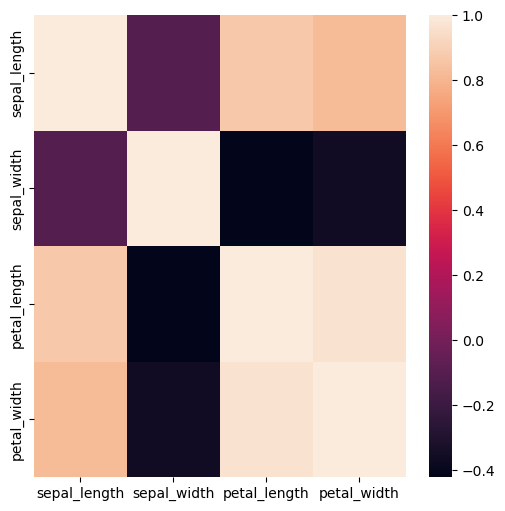

In [ ]:
import seaborn as sns
plt.figure(figsize= (6, 6))
sns.heatmap(data.corr())
plt.show(sns)

Para obtermos um resumo das medidas estatística dos dados:

In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Além do coeficiente de Pearson, podemos considerar o coeficiente de correlação de Spearman:

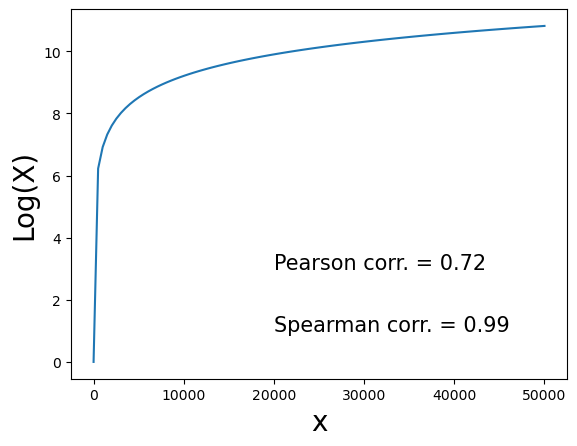

Pearson corr. =  0.72
Spearman corr. =  0.99


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

N = 100
x = np.linspace(1, 50000, N)
z = np.log(x)

plt.plot(x, z)
plt.xlabel("x",fontsize = 20)
plt.ylabel("Log(X)", fontsize = 20)
corr, p_value = pearsonr(x, z)
corrs, p_values = spearmanr(x, z)
corr = int(corr*100)/100
corrs = int(corrs*100)/100
string = 'Pearson corr. = '+ str(corr)
plt.text(20000,3, string, fontsize=15)
string = 'Spearman corr. = '+ str(corrs)
plt.text(20000,1, string, fontsize=15)
plt.show()
print('Pearson corr. = ', corr)
print('Spearman corr. = ', corrs)

Notem que nesse caso, os coeficientes de Spearman e Pearson são diferentes. Veja o material da aula teórica.

### Medidas de Entropia

A entropia de Shannon mede o grau de incerteza de uma variável aleatória, sendo definida por:
$$
H(X) = - \sum_{x} P(x)log_2 P(x),
$$
onde $P(x)$ é a probabilidade de observarmos a variável x. Por exemplo, no lançamento de um dado, x pode representar o valor na face de um dado.

Assim, a entropia de Shannon para um dado de N lados:

In [ ]:
from scipy.stats import entropy
import numpy as np
N = 6
Px = np.ones(N)*1/N
H = entropy(Px, base=2)
print("Entropia de Shannon: ", H)

Entropia de Shannon:  2.584962500721156


Notem que essa entropia é máxima, visto que a distribuição uniforme é a que oferece maior informação e maior dificuldade na previsão. Para um vetor com um único valor, a entropia é mínima (ou seja, um dado com faces iguais).
Vejam o exemplo abaixo para uma moeda cujas probabilidade de sair cara e coroa variam. Quando modificamos os valores das probabilidades, vemos que a entropia muda. A entropia é mínima para uma moeda com duas caras (ou duas coroas) e máxima para uma moeda justa. Isso ocorre porque é mais "difícil" acertar o resultado em uma moeda justa.

In [ ]:
from scipy.stats import entropy
Px = [1, 0] # probabilidade de sair cara e coroa
H = entropy(Px, base=2)
print("Entropia de Shannon: ", H)

Px = [0.75, 0.25] # a soma dos elementos do vetor deve ser igual a 1.
H = entropy(Px, base=2)
print("Entropia de Shannon: ", H)

Px = [0.5, 0.5]
H = entropy(Px, base=2)
print("Entropia de Shannon: ", H)

Entropia de Shannon:  0.0
Entropia de Shannon:  0.8112781244591328
Entropia de Shannon:  1.0


Para comprarmos dois histogramas (duas distribuições), podemos calcular a entropia de relativa (divergência de Kulback-Leibler), que é baseada na entropia de Shannon.
No código a seguir, mostramos como calcular essa medida. Ainda não precisamos nos preocupar do os detalhes dessa medida. Nessa aula, estamos interessados apenas no uso prático dessa medida e não nos conceitos teóricos. Para calcular a entropia relativa, usamos a função entropy da biblioteca scipy.

In [ ]:
from scipy.stats import entropy
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos

P = [0.25,0.55,0.2] # histograma 1
Q = [0.33, 0.33, 0.33] # histograma 2

print('KL(P,Q) = ', entropy(P,Q, base = np.exp(1)))
print('KL(Q,P) = ', entropy(Q,P, base = np.exp(1)))

KL(P,Q) =  0.10134076548572564
KL(Q,P) =  0.09924413610176085


Se as distribuições forem iguais.

In [ ]:
print('KL(P,P) = ', entropy(P,P, base = np.exp(1)))
print('KL(Q,Q) = ', entropy(Q,Q, base = np.exp(1)))

KL(P,P) =  0.0
KL(Q,Q) =  0.0


Vamos fazer mais um exemplo:

In [ ]:
from scipy.stats import entropy
P = [0.15,0.25,0.2]
Q = [0.3, 0.6, 0.1]

print('KL(P,Q) = ', entropy(P,Q, base = np.exp(1)))
print('KL(Q,P) = ', entropy(Q,P, base = np.exp(1)))

KL(P,Q) =  0.20380924824852753
KL(Q,P) =  0.15308505475833864


In [ ]:
from scipy.stats import entropy
import numpy as np
P = [0.15,0.25,0.2]
Q = [0.3, 0.6, 0.1]

print('KL(P,Q) = ', entropy(P,Q, base = np.exp(1)))
print('KL(Q,P) = ', entropy(Q,P, base = np.exp(1)))

KL(P,Q) =  0.20380924824852753
KL(Q,P) =  0.15308505475833864


Notem que KL(P,Q) pode ser diferente de KL(Q,P).

## Exercícios de fixação

Não é necessário entregar os exercícios abaixo, mas é importante resolvê-los para fixar os conteúdos estudados.

1 -  Considere uma moeda cuja probabilidade de sair cara é $p$. Monte um gráfico da entropia em função do valor de $p$.

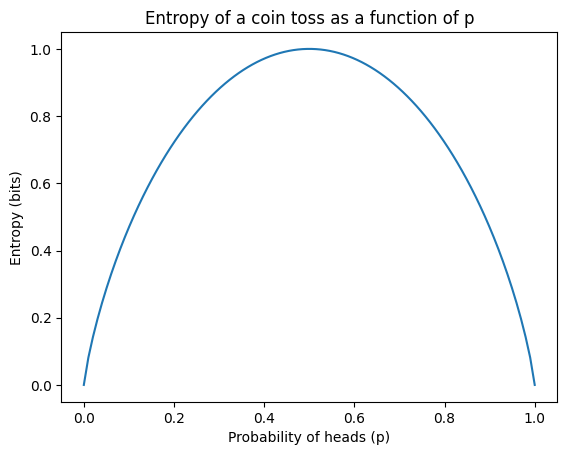

In [15]:
# prompt: Considere uma moeda cuja probabilidade de sair cara é  p . Monte um gráfico da entropia em função do valor de  p .

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Define a range of probabilities for the coin
p = np.linspace(0, 1, 100)

# Calculate the entropy for each probability
H = entropy(np.array([p, 1-p]), base=2)

# Plot the entropy as a function of p
plt.plot(p, H)
plt.xlabel("Probability of heads (p)")
plt.ylabel("Entropy (bits)")
plt.title("Entropy of a coin toss as a function of p")
plt.show()


2 - Gere dados a partir de uma distribuição de Poisson. Calcula a média e variância e compare seus valores.

In [16]:
# prompt: Gere dados a partir de uma distribuição de Poisson. Calcula a média e variância e compare seus valores. comentarios em português.

# Importa a biblioteca NumPy
import numpy as np

# Define a média da distribuição de Poisson
lambda_value = 5

# Gera 10000 números aleatórios a partir da distribuição de Poisson
data = np.random.poisson(lambda_value, 10000)

# Calcula a média dos dados
mean = np.mean(data)

# Calcula a variância dos dados
variance = np.var(data)

# Imprime os resultados
print("Média:", mean)
print("Variância:", variance)

# Compara os valores da média e da variância
if mean == variance:
    print("A média e a variância são iguais.")
else:
    print("A média e a variância são diferentes.")


Média: 4.986
Variância: 4.944004
A média e a variância são diferentes.


3 - Calcula e a divergência de Kullback-Leibler entre as distribuições normal e Poisson. Gerem os dados com mesma média e variância.

In [24]:
# prompt: Calcula e a divergência de Kullback-Leibler entre as distribuições normal e Poisson. Gerem os dados com mesma média e variância.

import numpy as np
from scipy.stats import poisson, norm
from scipy.special import logsumexp

# Define the parameters of the normal and Poisson distributions
mu = 5
sigma = 2
lambda_value = mu

# Generate 10000 random numbers from each distribution
normal_data = np.random.normal(mu, sigma, 10000)
poisson_data = np.random.poisson(lambda_value, 10000)

# Calculate the probability mass function (pmf) of each data point under each distribution
normal_pdf = norm.pdf(normal_data, mu, sigma)
poisson_pmf = poisson.pmf(poisson_data, lambda_value)

# Calculate the Kullback-Leibler divergence between the two distributions
kl_divergence = np.sum(normal_pdf * np.log(normal_pdf / poisson_pmf))

# Print the result
print("Kullback-Leibler divergence:", kl_divergence)


Kullback-Leibler divergence: 506.42289818931295


4 - Calcula e a divergência de Kullback-Leibler entre as distribuições Binomial e Poisson. Gerem os dados com mesma média e variância.

In [30]:
# prompt: Calcula e a divergência de Kullback-Leibler entre as distribuições Binomial e Poisson. Gerem os dados com mesma média e variância. comentarios em portugues.


# Import the scipy.stats module
from scipy import stats as st

# Define the binomial and poisson distributions
binom = st.binom(n, p)
poisson = st.poisson(lambda_value)
import numpy as np
# Define os parâmetros das distribuições binomial e Poisson
n = 10  # Número de ensaios na distribuição binomial
p = 0.5  # Probabilidade de sucesso na distribuição binomial
lambda_value = n * p  # Média da distribuição Poisson

# Gera 10000 números aleatórios de cada distribuição
binomial_data = np.random.binomial(n, p, 10000)
poisson_data = np.random.poisson(lambda_value, 10000)

# Calcula a função de massa de probabilidade (pmf) de cada ponto de dados sob cada distribuição
binomial_pmf = binom.pmf(binomial_data)
poisson_pmf = poisson.pmf(poisson_data)

# Calcula a divergência de Kullback-Leibler entre as duas distribuições
kl_divergence = np.sum(binomial_pmf * np.log(binomial_pmf / poisson_pmf))

# Imprime o resultado
print("Divergência de Kullback-Leibler:", kl_divergence)


Divergência de Kullback-Leibler: 972.4689767160594


5 - Para a função log(), investigue como as correlações de Pearson e Spearman variam de acordo com o intervalo dos dados.

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

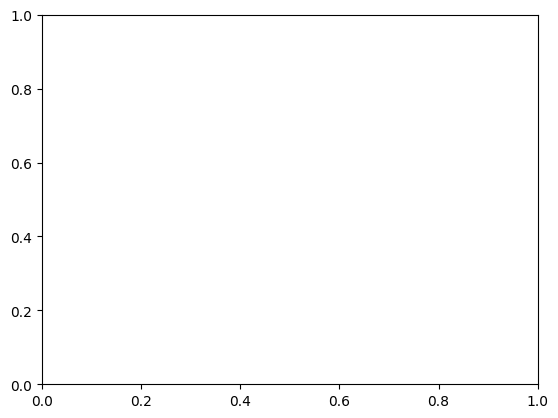

In [31]:
# prompt: Para a função log(), investigue como as correlações de Pearson e Spearman variam de acordo com o intervalo dos dados.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Define a range of values for x
x = np.linspace(1, 50000, 100)

# Calculate the log of x
y = np.log(x)

# Calculate the Pearson and Spearman correlations between x and y
pearson_corr, _ = pearsonr(x, y)
spearman_corr, _ = spearmanr(x, y)

# Plot the results
plt.plot(x, pearson_corr, label="Pearson correlation")
plt.plot(x, spearman_corr, label="Spearman correlation")
plt.xlabel("x")
plt.ylabel("Correlation")
plt.legend()
plt.show()


Para a função x^2 (x > 0), calcule os coeficientes de Pearson e Spearman.

In [37]:
# prompt: Para a função x^2 (x > 0), calcule os coeficientes de Pearson e Spearman.

import numpy as np
# Define a range of values for x
x = np.linspace(1, 50000, 100)

# Calculate the square of x
y = x**2

# Calculate the Pearson and Spearman correlations between x and y
pearson_corr, _ = pearsonr(x, y)
spearman_corr, _ = spearmanr(x, y)

# Print the results
print("Pearson correlation:", pearson_corr)
print("Spearman correlation:", spearman_corr)


Pearson correlation: 0.9676468568012374
Spearman correlation: 0.9999999999999999
